# Seaborn을 사용한 데이터 분포 시각화

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [6]:
iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
flights = sns.load_dataset("flights")

### 1차원 분포 플롯

### 1차원 실수 분포 플롯

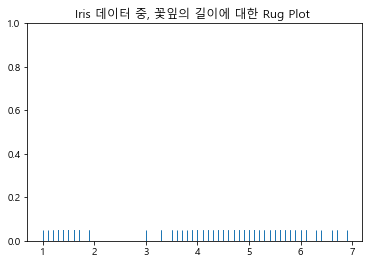

In [7]:
x = iris.petal_length.values

sns.rugplot(x)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Rug Plot ")
plt.show()

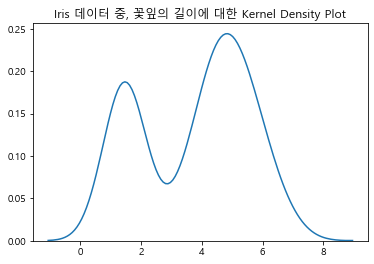

In [8]:
sns.kdeplot(x) # rug=True는 안됨(중복을 사용하려면 distplot을 사용)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Kernel Density Plot")
plt.show()

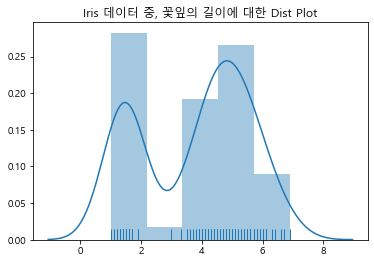

In [9]:
sns.distplot(x, kde=True, rug=True)
plt.title("Iris 데이터 중, 꽃잎의 길이에 대한 Dist Plot")
plt.show()

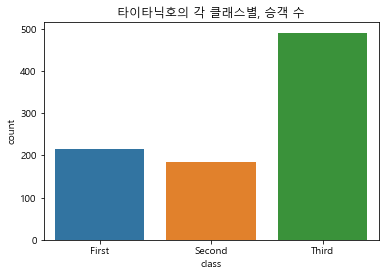

In [10]:
sns.countplot(x="class", data=titanic)
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

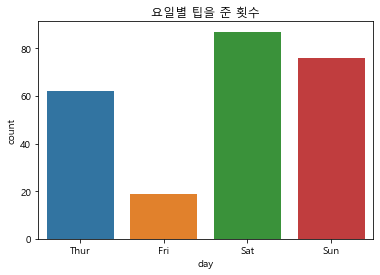

In [11]:
sns.countplot(x="day", data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

In [15]:
tips.groupby('day').count()['tip']

day
Thur    62
Fri     19
Sat     87
Sun     76
Name: tip, dtype: int64

### 다차원 데이터

### 2차원 실수형 데이터

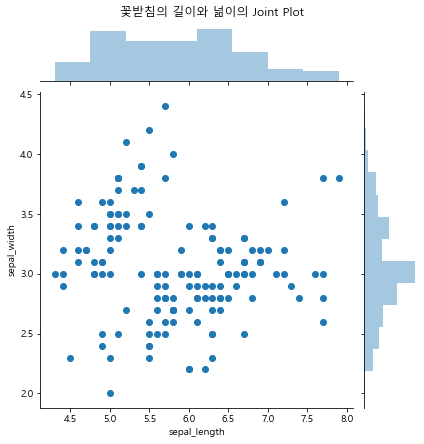

In [19]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.suptitle("꽃받침의 길이와 넒이의 Joint Plot", y=1.02)
plt.show()
# K-means는 비지도 학습 -> 정답이 없다는 가정하에 나누는 것

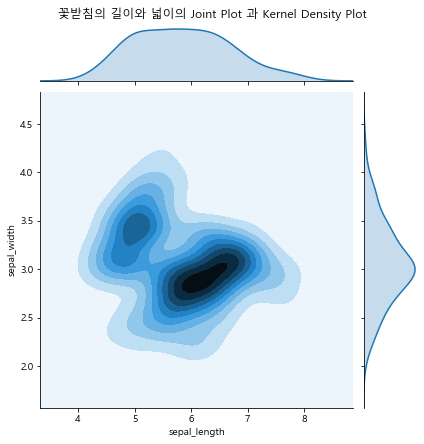

In [20]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot", y=1.02)
plt.show()

### 다차원 실수형 데이터

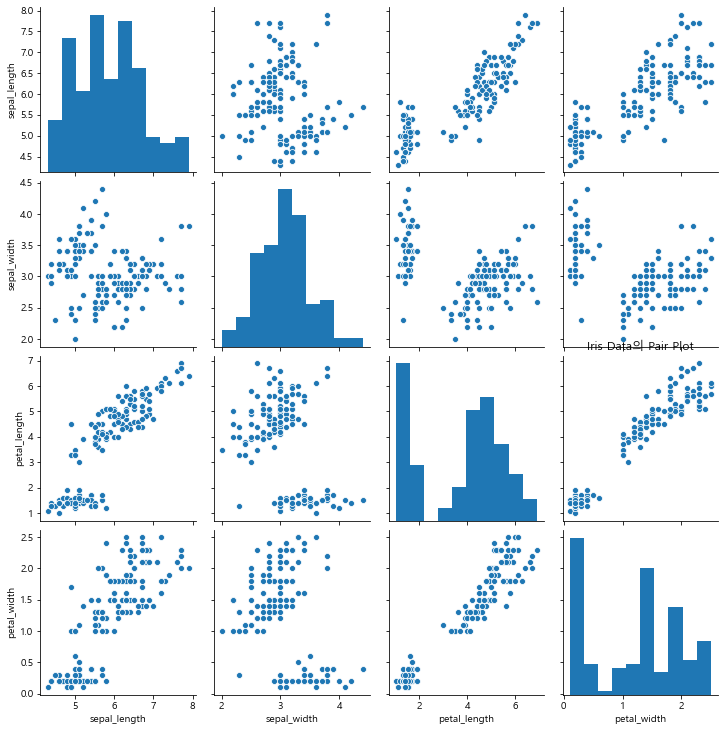

In [21]:
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")
plt.show()

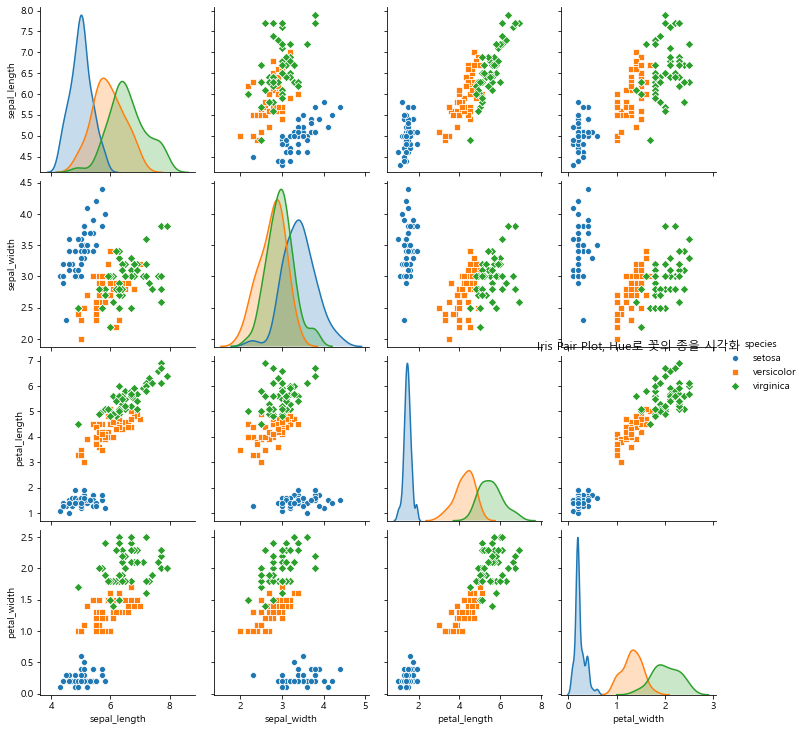

In [22]:
sns.pairplot(iris, hue="species" , markers=["o", "s", "D"])
# hue="species"는 종별로 색을 입히라는 의미, marker는 종별 모양을 의미한다.
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()

### 차원 카테고리 데이터

In [23]:
titanic_size = titanic.pivot_table(
    index="class", columns="sex", aggfunc="size")
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


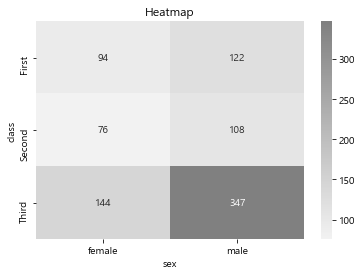

In [24]:
sns.heatmap(titanic_size, cmap=sns.light_palette(
    "gray", as_cmap=True), annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

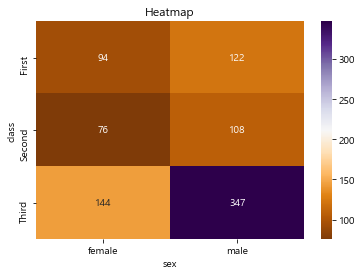

In [30]:
sns.heatmap(titanic_size, cmap="PuOr", annot=True, fmt="d")
plt.title("Heatmap")
plt.show()

### 2차원 복합 데이터

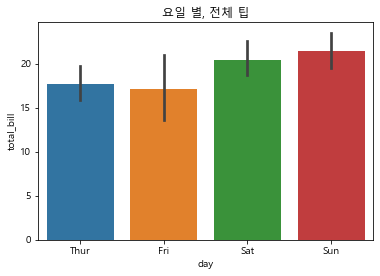

In [31]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("요일 별, 전체 팁")
plt.show()
# 검은bar는 편차를 의미

In [32]:
mpg = sns.load_dataset('mpg')

In [33]:
def get_manufacturer(s):
    return s.split()[0]

def get_model(s):
    return ' '.join(s.split()[1:])
mpg['manufacturer'] = mpg.name.apply(get_manufacturer)
mpg['model'] = mpg.name.apply(get_model)

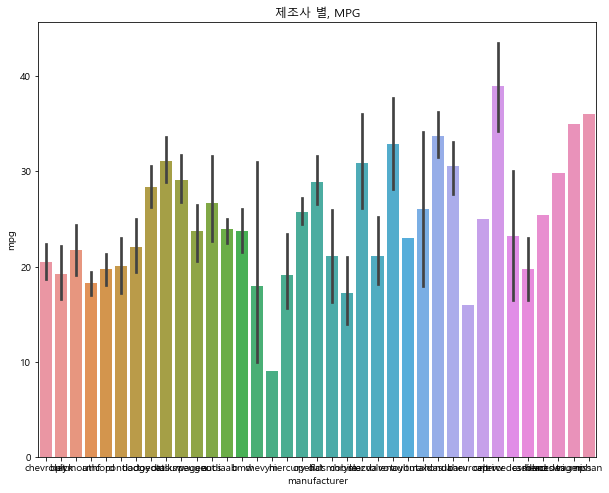

In [45]:
plt.figure(figsize=(10,8))
sns.barplot(x='manufacturer', y='mpg', data=mpg)
plt.title('제조사 별, MPG')
plt.show()

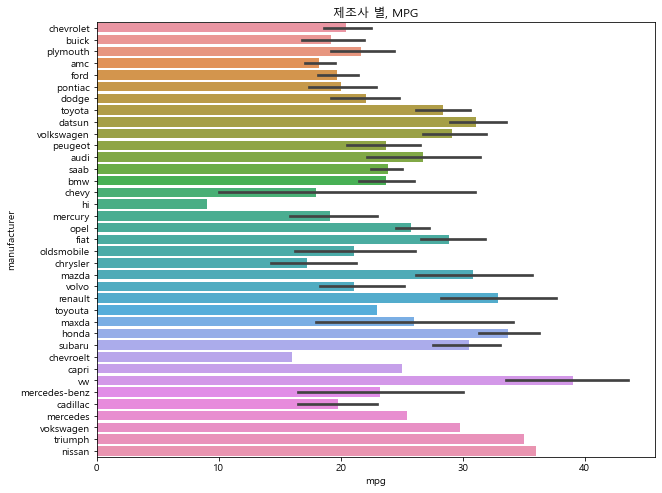

In [44]:
plt.figure(figsize=(10,8))
sns.barplot(y='manufacturer', x='mpg', data=mpg)
plt.title('제조사 별, MPG')
plt.show()

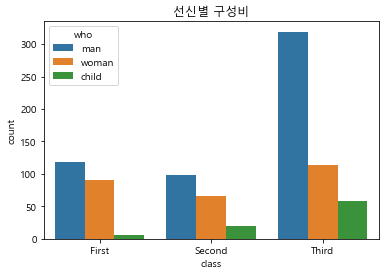

In [57]:
sns.countplot(x = 'class', hue = 'who', data = titanic)
plt.title('선신별 구성비')
plt.show()

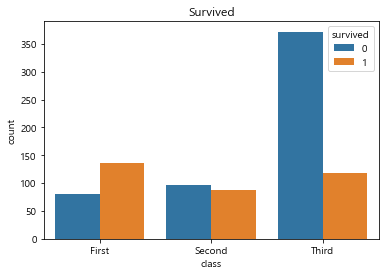

In [50]:
sns.countplot(x = 'class', hue = 'survived', data = titanic)
plt.title('Survived')
plt.show()

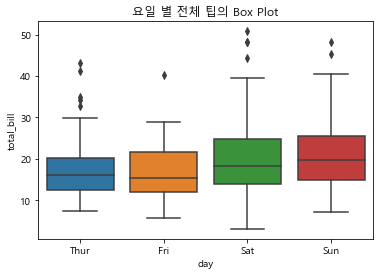

In [51]:
sns.boxplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Box Plot")
plt.show()

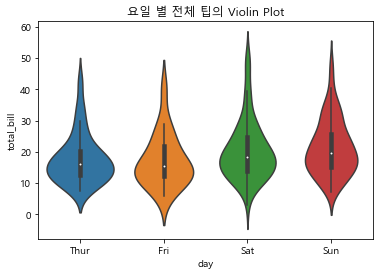

In [52]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Violin Plot")
plt.show()
# boxplot의 변종 - 1

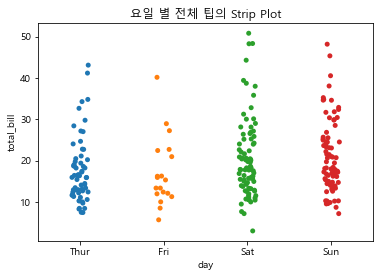

In [53]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)
plt.title("요일 별 전체 팁의 Strip Plot")
plt.show()
# boxplot의 변종 - 2

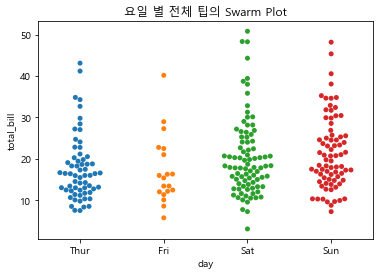

In [54]:
sns.swarmplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Swarm Plot")
plt.show()
# boxplot의 변종 - 3

### 다차원 복합 데이터

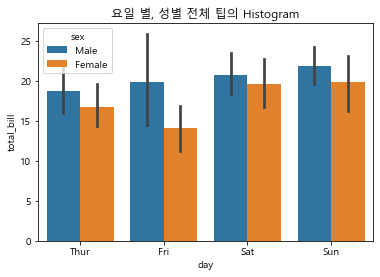

In [56]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Histogram")
plt.show()

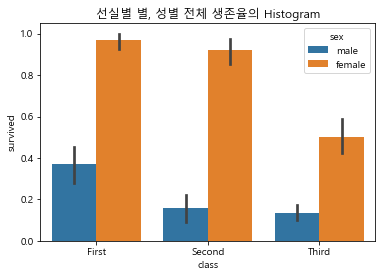

In [59]:
sns.barplot(x="class", y="survived", hue="sex", data=titanic)
plt.title("선실별 별, 성별 전체 생존율의 Histogram")
plt.show()

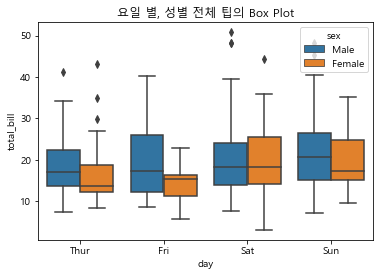

In [61]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Box Plot")
plt.show()

In [63]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [68]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


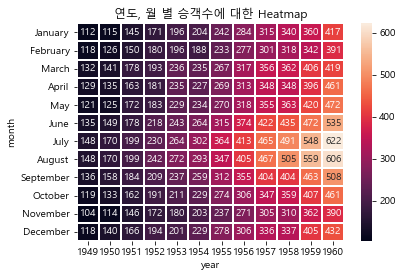

In [62]:
flights_passengers = flights.pivot("month", "year", "passengers")
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)
plt.show()

### catplot
#### 3가지 이상의 카테고리 값에 의한 분포 변화를 보여줄 때

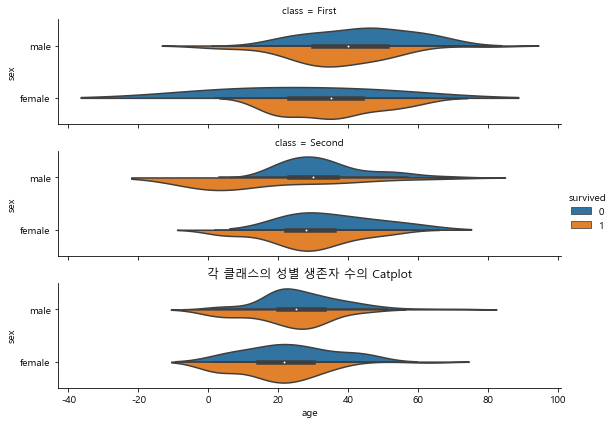

In [69]:
data = titanic[titanic.survived.notnull()]
sns.catplot(x="age", y="sex", hue="survived", row="class", data=data,
            kind="violin", split=True, height=2, aspect=4)
plt.title("각 클래스의 성별 생존자 수의 Catplot")
plt.show()

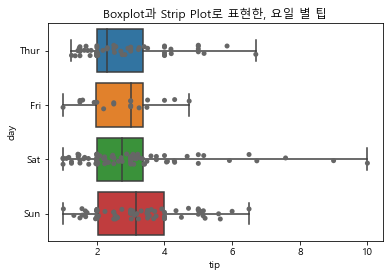

In [70]:
plt.title("Boxplot과 Strip Plot로 표현한, 요일 별 팁")
sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="0.4")
plt.show()

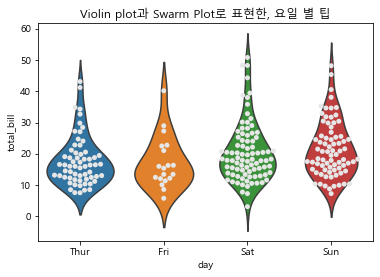

In [71]:
plt.title("Violin plot과 Swarm Plot로 표현한, 요일 별 팁")
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.9")
plt.show()